# 1. Know Your Data

# Import Libraries

In [1]:




#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd


In [4]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns







# Load Dataset

In [5]:

# We read the labels into a csv file using the pandas library:
train_original = pd.read_csv('C:/Users/F5401895/OneDrive - FRG/Documents/Zindi Data Science Challenges/Traffic_Jam_Predicting _Peoples_Movement_into_Nairobi/train_revised.csv')


In [6]:
# We read the labels into a csv file using the pandas library:
test_original = pd.read_csv('C:/Users/F5401895/OneDrive - FRG/Documents/Zindi Data Science Challenges/Traffic_Jam_Predicting _Peoples_Movement_into_Nairobi/test_questions.csv')


# Dataset First View

In [7]:

# Dataset First Look
train_original.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


# Dataset Rows & Columns count

## # Dataset Rows & Columns count
train_original.shape

In [8]:

train_original.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [9]:
train_original.index

RangeIndex(start=0, stop=51645, step=1)

# Dataset Information

In [10]:

# Dataset Info
train_original.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


# Duplicate Values

In [11]:
# Dataset Duplicate Value Count
train_original.duplicated().sum()

0

# Missing Values/Null Values

In [12]:

# Missing Values/Null Values Count
train_original.isna().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [13]:

# Visualizing the missing values
train_original.isnull().sum().sort_values(ascending=False)

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

What did you know about your dataset?

In this Dataset their are 10 columns, no duplicates 

In [14]:
Target=train_original.groupby(["ride_id"]).seat_number.count().rename("number_of_ticket").reset_index()
train_df=train_original.drop_duplicates("ride_id").drop(['payment_method', 'payment_receipt', 'seat_number'],axis=1)
train_df=train_df.merge(Target,how="left",on="ride_id")
train_df.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,27-11-17,7:12,Migori,Nairobi,Bus,49,31


# 2. Understanding Your Variables

In [15]:
# Dataset Columns
train_df.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'travel_to',
       'car_type', 'max_capacity', 'number_of_ticket'],
      dtype='object')

In [16]:

# Dataset Describe
train_df.describe(include='all')

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
count,6249.000000,6249,6249,6249,6249,6249,6249.000000,6249.000000
unique,NaN,149,78,17,1,2,NaN,NaN
top,NaN,10-12-17,7:04,Kisii,Nairobi,Bus,NaN,NaN
freq,NaN,94,403,3020,6249,3189,NaN,NaN
mean,9963.644583,NaN,NaN,NaN,NaN,NaN,30.392223,8.264522
std,2296.304872,NaN,NaN,NaN,NaN,NaN,18.997471,8.632968
min,1442.000000,NaN,NaN,NaN,NaN,NaN,11.000000,1.000000
25%,7989.000000,NaN,NaN,NaN,NaN,NaN,11.000000,2.000000
50%,10024.000000,NaN,NaN,NaN,NaN,NaN,49.000000,7.000000
75%,11917.000000,NaN,NaN,NaN,NaN,NaN,49.000000,11.000000


# Check Unique Values for each variable.

In [17]:

# Check Unique Values for each variable.
print(train_df.apply(lambda col: col.unique()))

ride_id             [1442, 5437, 5710, 5777, 5778, 5781, 5784, 578...
travel_date         [17-10-17, 19-11-17, 26-11-17, 27-11-17, 20-04...
travel_time         [7:15, 7:12, 7:05, 7:10, 7:09, 5:10, 9:50, 7:0...
travel_from         [Migori, Keroka, Homa Bay, Kisii, Keumbu, Rong...
travel_to                                                   [Nairobi]
car_type                                               [Bus, shuttle]
max_capacity                                                 [49, 11]
number_of_ticket    [1, 5, 31, 26, 2, 3, 11, 4, 9, 6, 8, 10, 24, 7...
dtype: object


In [18]:

train_df.travel_from.unique()

array(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], dtype=object)

In [19]:
train_df.car_type.unique()

array(['Bus', 'shuttle'], dtype=object)

# 3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

In [20]:
# Chart - 1 visualization code
# Count the number of occurrences of each target value 
target_count = train_df['car_type'].value_counts().reset_index()
# Rename the columns of the resulting DataFrame to 'car type' and 'count', respectively
target_count.columns = ['car_type','count']
target_count

,car_type,count
0,Bus,3189
1,shuttle,3060


Text(0, 0.5, 'Count')

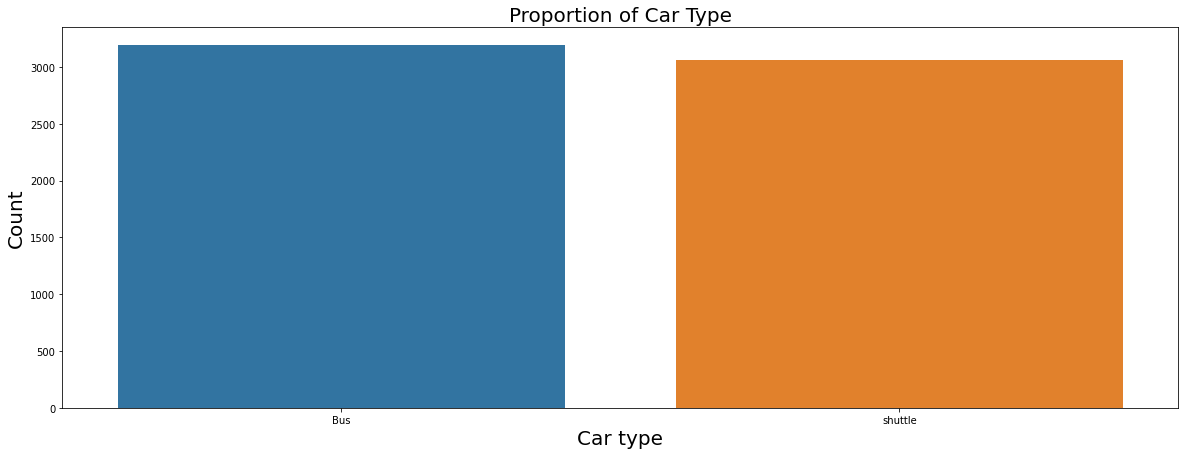

In [21]:
plt.figure(figsize=(20,7))
ax = sns.barplot(x="car_type", y='count', data=target_count)
ax.set_title("Proportion of Car Type", fontsize=20)
ax.set_xlabel("Car type", fontsize=20)
ax.set_ylabel('Count', fontsize=20)

We can see the number of bus and shuttle are similair from the dataset 

Text(0, 0.5, 'Count')

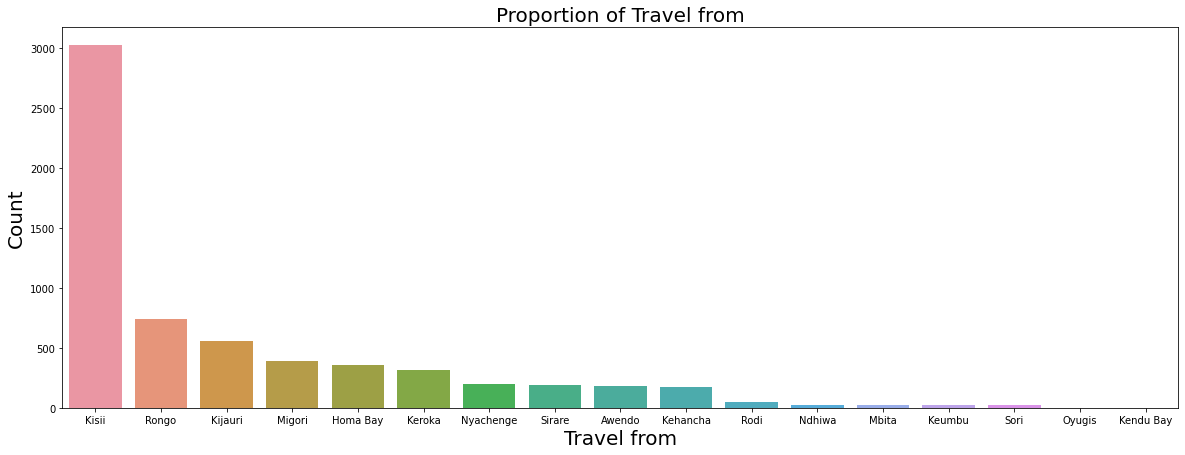

In [22]:
# Chart - 1 visualization code
# Count the number of occurrences of each target value 
target_count = train_df['travel_from'].value_counts().reset_index()
# Rename the columns of the resulting DataFrame 
target_count.columns = ['travel_from','count']
plt.figure(figsize=(20,7))
ax = sns.barplot(x="travel_from", y='count', data=target_count)
ax.set_title("Proportion of Travel from", fontsize=20)
ax.set_xlabel("Travel from", fontsize=20)
ax.set_ylabel('Count', fontsize=20)

We can see that most customers travelling from Kisii compare to Kendu Bay

<Axes: xlabel='car_type', ylabel='max_capacity'>

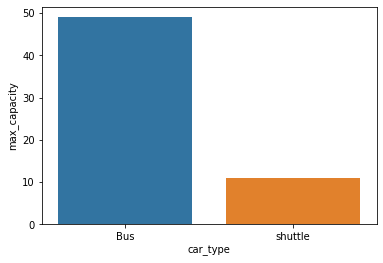

In [23]:
sns.barplot(x='car_type',y='max_capacity',data=train_df)

We can see that Buses have more capacity than shuttles 

<Axes: xlabel='car_type', ylabel='number_of_ticket'>

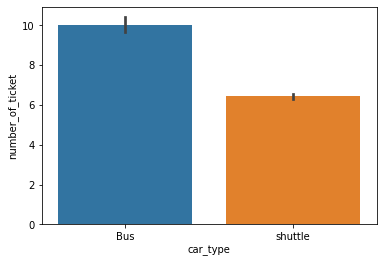

In [24]:
sns.barplot(x='car_type',y='number_of_ticket',data=train_df)

More tickects buses are sold compare to shuttle

<Axes: xlabel='travel_from', ylabel='number_of_ticket'>

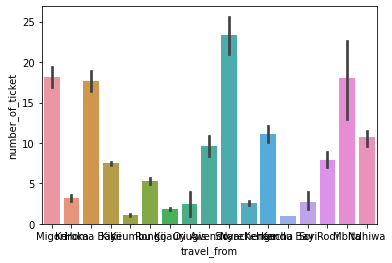

In [25]:
sns.barplot(x='travel_from',y='number_of_ticket',data=train_df)

In [26]:
#Extract hour from time
train_df['hour_booked'] = pd.to_numeric(train_df['travel_time'].str.extract(r'(^\d*)').loc[:,0])
train_df

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket,hour_booked
0,1442,17-10-17,7:15,Migori,Nairobi,Bus,49,1,7
1,5437,19-11-17,7:12,Migori,Nairobi,Bus,49,1,7
2,5710,26-11-17,7:05,Keroka,Nairobi,Bus,49,1,7
3,5777,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5,7
4,5778,27-11-17,7:12,Migori,Nairobi,Bus,49,31,7
...,...,...,...,...,...,...,...,...,...
6244,13812,20-04-18,23:10,Ndhiwa,Nairobi,Bus,49,11,23
6245,13813,20-04-18,7:05,Ndhiwa,Nairobi,Bus,49,11,7
6246,13825,20-04-18,7:09,Rongo,Nairobi,Bus,49,1,7
6247,13826,20-04-18,8:00,Awendo,Nairobi,Bus,49,1,8


<Axes: xlabel='hour_booked'>

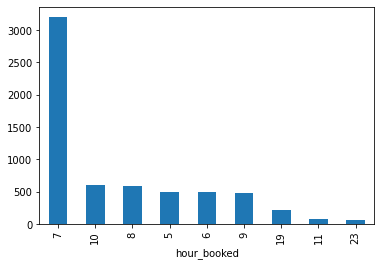

In [27]:
train_df['hour_booked'].value_counts().plot.bar()

We can see around 7 most customers commute their jounery

<Axes: ylabel='Frequency'>

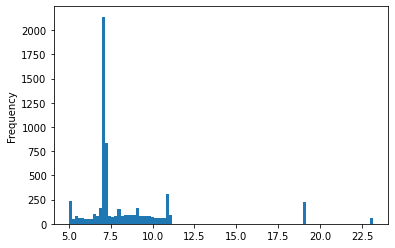

In [28]:
train_df["travel_time"] = train_df["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
(train_df["travel_time"]/60).plot.hist(bins=100)

We can see the distribution customer most travel/commute around 7. Most of the journeys take place before noon with some journeys at 7pm and 11pm.

We can also explore to see if people are likely to travel on a particular day of the week more than the rest.

In [29]:
train_df

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket,hour_booked
0,1442,17-10-17,435,Migori,Nairobi,Bus,49,1,7
1,5437,19-11-17,432,Migori,Nairobi,Bus,49,1,7
2,5710,26-11-17,425,Keroka,Nairobi,Bus,49,1,7
3,5777,27-11-17,430,Homa Bay,Nairobi,Bus,49,5,7
4,5778,27-11-17,432,Migori,Nairobi,Bus,49,31,7
...,...,...,...,...,...,...,...,...,...
6244,13812,20-04-18,1390,Ndhiwa,Nairobi,Bus,49,11,23
6245,13813,20-04-18,425,Ndhiwa,Nairobi,Bus,49,11,7
6246,13825,20-04-18,429,Rongo,Nairobi,Bus,49,1,7
6247,13826,20-04-18,480,Awendo,Nairobi,Bus,49,1,8


In [30]:
train_df['travel_date'] = pd.to_datetime(train_df['travel_date']) 

train_df['travel_day'] = train_df['travel_date'].dt.dayofweek
train_df


,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket,hour_booked,travel_day
0,1442,2017-10-17,435,Migori,Nairobi,Bus,49,1,7,1
1,5437,2017-11-19,432,Migori,Nairobi,Bus,49,1,7,6
2,5710,2017-11-26,425,Keroka,Nairobi,Bus,49,1,7,6
3,5777,2017-11-27,430,Homa Bay,Nairobi,Bus,49,5,7,0
4,5778,2017-11-27,432,Migori,Nairobi,Bus,49,31,7,0
...,...,...,...,...,...,...,...,...,...,...
6244,13812,2018-04-20,1390,Ndhiwa,Nairobi,Bus,49,11,23,4
6245,13813,2018-04-20,425,Ndhiwa,Nairobi,Bus,49,11,7,4
6246,13825,2018-04-20,429,Rongo,Nairobi,Bus,49,1,7,4
6247,13826,2018-04-20,480,Awendo,Nairobi,Bus,49,1,8,4


In [31]:
train_df["travel_yr"] = train_df["travel_date"].dt.year
train_df

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket,hour_booked,travel_day,travel_yr
0,1442,2017-10-17,435,Migori,Nairobi,Bus,49,1,7,1,2017
1,5437,2017-11-19,432,Migori,Nairobi,Bus,49,1,7,6,2017
2,5710,2017-11-26,425,Keroka,Nairobi,Bus,49,1,7,6,2017
3,5777,2017-11-27,430,Homa Bay,Nairobi,Bus,49,5,7,0,2017
4,5778,2017-11-27,432,Migori,Nairobi,Bus,49,31,7,0,2017
...,...,...,...,...,...,...,...,...,...,...,...
6244,13812,2018-04-20,1390,Ndhiwa,Nairobi,Bus,49,11,23,4,2018
6245,13813,2018-04-20,425,Ndhiwa,Nairobi,Bus,49,11,7,4,2018
6246,13825,2018-04-20,429,Rongo,Nairobi,Bus,49,1,7,4,2018
6247,13826,2018-04-20,480,Awendo,Nairobi,Bus,49,1,8,4,2018


In [32]:
train_df.travel_yr.unique()

array([2017, 2018])

In [33]:
#Calculating the number of weeks in the dataset we have data for
a=train_df[train_df["travel_yr"]==2018]["travel_date"].dt.week.nunique() + train_df[train_df["travel_yr"]==2017]["travel_date"].dt.week.nunique()
a

AttributeError: 'DatetimeProperties' object has no attribute 'week'

In [34]:
#Display people to travel on a particular day of the week more than the rest by shuttle.
(train_df[train_df['car_type']=='shuttle']["travel_day"].value_counts()/a).plot.bar()

NameError: name 'a' is not defined

In [35]:
#Display people to travel on a particular day of the week more than the rest by shuttle.
(train_df[train_df['car_type']=='Bus']["travel_day"].value_counts()/a).plot.bar()

NameError: name 'a' is not defined

From the above analysis, there seem to be no clear indication that the day of the week matters as the average people that travel on a particular day seems to change with context.

Lastly we can check to see the distribution for ticket sales.

<Axes: ylabel='Density'>

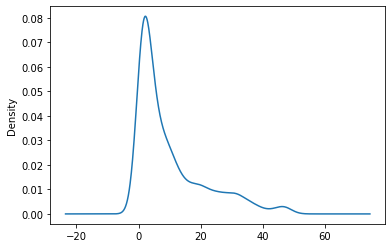

In [36]:
((train_df[train_df['car_type']=='Bus']['number_of_ticket'])).plot.density()

The  distribution for ticket sale using Bus, seem like normal distribution 

<Axes: ylabel='Density'>

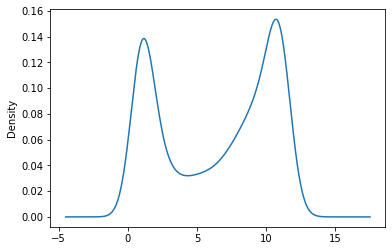

In [37]:
((train_df[train_df['car_type']=='shuttle']['number_of_ticket'])).plot.density()

The distribution for ticket sale using Shuttle, 

It can be seen that for buses, the bus is usually almost empty while for the shuttles, they are almost always full or empty.

# 4. Feature Engineering & Data Pre-processing

# 4.1. Handling Missing Values

In [38]:

# Handling Missing Values & Missing Value Imputation
train_df.isnull().sum().sort_values(ascending=False)

ride_id             0
travel_date         0
travel_time         0
travel_from         0
travel_to           0
car_type            0
max_capacity        0
number_of_ticket    0
hour_booked         0
travel_day          0
travel_yr           0
dtype: int64

# 4.2. Label encoding some variables

In [39]:
from sklearn.preprocessing import LabelEncoder
columns = ('car_type', 'max_capacity', 'travel_from')
for col in columns:
    le = LabelEncoder()
    le.fit(list(train_df[col].values))
    train_df[col] = le.transform(list(train_df[col].values))
print(f'shape: {train_df.shape}')

shape: (6249, 11)


In [40]:
train_df

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket,hour_booked,travel_day,travel_yr
0,1442,2017-10-17,435,9,Nairobi,0,1,1,7,1,2017
1,5437,2017-11-19,432,9,Nairobi,0,1,1,7,6,2017
2,5710,2017-11-26,425,4,Nairobi,0,1,1,7,6,2017
3,5777,2017-11-27,430,1,Nairobi,0,1,5,7,0,2017
4,5778,2017-11-27,432,9,Nairobi,0,1,31,7,0,2017
...,...,...,...,...,...,...,...,...,...,...,...
6244,13812,2018-04-20,1390,10,Nairobi,0,1,11,23,4,2018
6245,13813,2018-04-20,425,10,Nairobi,0,1,11,7,4,2018
6246,13825,2018-04-20,429,14,Nairobi,0,1,1,7,4,2018
6247,13826,2018-04-20,480,0,Nairobi,0,1,1,8,4,2018


In [41]:
#Trying to linearize the travel time feature for better prediction
train_df['travel_time_log']=np.log(train_df['travel_time'])
train_df

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket,hour_booked,travel_day,travel_yr,travel_time_log
0,1442,2017-10-17,435,9,Nairobi,0,1,1,7,1,2017,6.075346
1,5437,2017-11-19,432,9,Nairobi,0,1,1,7,6,2017,6.068426
2,5710,2017-11-26,425,4,Nairobi,0,1,1,7,6,2017,6.052089
3,5777,2017-11-27,430,1,Nairobi,0,1,5,7,0,2017,6.063785
4,5778,2017-11-27,432,9,Nairobi,0,1,31,7,0,2017,6.068426
...,...,...,...,...,...,...,...,...,...,...,...,...
6244,13812,2018-04-20,1390,10,Nairobi,0,1,11,23,4,2018,7.237059
6245,13813,2018-04-20,425,10,Nairobi,0,1,11,7,4,2018,6.052089
6246,13825,2018-04-20,429,14,Nairobi,0,1,1,7,4,2018,6.061457
6247,13826,2018-04-20,480,0,Nairobi,0,1,1,8,4,2018,6.173786


In [42]:

train_df['travel_month'] = pd.DatetimeIndex(train_df['travel_date']).month
train_df['travel_day_day'] = pd.DatetimeIndex(train_df['travel_date']).day
train_df



,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket,hour_booked,travel_day,travel_yr,travel_time_log,travel_month,travel_day_day
0,1442,2017-10-17,435,9,Nairobi,0,1,1,7,1,2017,6.075346,10,17
1,5437,2017-11-19,432,9,Nairobi,0,1,1,7,6,2017,6.068426,11,19
2,5710,2017-11-26,425,4,Nairobi,0,1,1,7,6,2017,6.052089,11,26
3,5777,2017-11-27,430,1,Nairobi,0,1,5,7,0,2017,6.063785,11,27
4,5778,2017-11-27,432,9,Nairobi,0,1,31,7,0,2017,6.068426,11,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,13812,2018-04-20,1390,10,Nairobi,0,1,11,23,4,2018,7.237059,4,20
6245,13813,2018-04-20,425,10,Nairobi,0,1,11,7,4,2018,6.052089,4,20
6246,13825,2018-04-20,429,14,Nairobi,0,1,1,7,4,2018,6.061457,4,20
6247,13826,2018-04-20,480,0,Nairobi,0,1,1,8,4,2018,6.173786,4,20


In [43]:
test_original

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11
...,...,...,...,...,...,...,...
1106,15336,2018-05-07,07:01,Oyugis,Nairobi,Bus,49
1107,15337,2018-05-07,07:08,Kehancha,Nairobi,Bus,49
1108,15338,2018-05-07,07:04,Rongo,Nairobi,Bus,49
1109,15339,2018-05-07,07:05,Ndhiwa,Nairobi,Bus,49


In [44]:
test_original["travel_time"] = test_original["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [45]:
test_original['travel_time_log']=np.log(test_original['travel_time'])
test_original

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,travel_time_log
0,247,2018-05-07,426,Kisii,Nairobi,Bus,49,6.054439
1,256,2018-05-06,668,Kisii,Nairobi,shuttle,11,6.504288
2,275,2018-05-04,300,Kisii,Nairobi,shuttle,11,5.703782
3,285,2018-05-04,550,Kisii,Nairobi,shuttle,11,6.309918
4,286,2018-05-04,560,Kisii,Nairobi,shuttle,11,6.327937
...,...,...,...,...,...,...,...,...
1106,15336,2018-05-07,421,Oyugis,Nairobi,Bus,49,6.042633
1107,15337,2018-05-07,428,Kehancha,Nairobi,Bus,49,6.059123
1108,15338,2018-05-07,424,Rongo,Nairobi,Bus,49,6.049733
1109,15339,2018-05-07,425,Ndhiwa,Nairobi,Bus,49,6.052089


In [46]:
from sklearn.preprocessing import LabelEncoder
columns = ('car_type', 'max_capacity', 'travel_from')
for col in columns:
    le = LabelEncoder()
    le.fit(list(test_original[col].values))
    test_original[col] = le.transform(list(test_original[col].values))
print(f'shape: {test_original.shape}')

shape: (1111, 8)


In [47]:
test_original

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,travel_time_log
0,247,2018-05-07,426,5,Nairobi,0,1,6.054439
1,256,2018-05-06,668,5,Nairobi,1,0,6.504288
2,275,2018-05-04,300,5,Nairobi,1,0,5.703782
3,285,2018-05-04,550,5,Nairobi,1,0,6.309918
4,286,2018-05-04,560,5,Nairobi,1,0,6.327937
...,...,...,...,...,...,...,...,...
1106,15336,2018-05-07,421,10,Nairobi,0,1,6.042633
1107,15337,2018-05-07,428,2,Nairobi,0,1,6.059123
1108,15338,2018-05-07,424,12,Nairobi,0,1,6.049733
1109,15339,2018-05-07,425,8,Nairobi,0,1,6.052089


# Finding Important Features

 We're going to let scikit-learn help us determine which variables are the best at predicting number of tickets using RandomForest.

In [48]:
import featuretools as ft


In [49]:
from sklearn.ensemble import RandomForestClassifier

features = np.array(['travel_day','travel_time','travel_from','max_capacity','travel_yr','travel_day_day','travel_month'
                     ])
clf = RandomForestClassifier()
clf.fit(train_df[features], train_df['number_of_ticket'])

RandomForestClassifier()

In [50]:
# from the calculated importances, order them from most to least important
# and make a barplot so we can visualize what is/isn't important
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

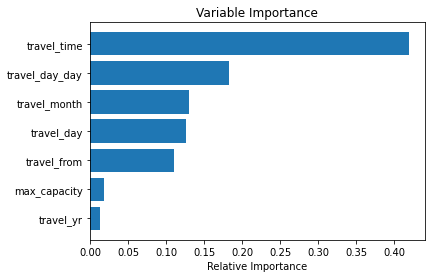

In [51]:
padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

# Interpretting the results


# Feature

In [52]:
def calculate_time_period(travel_time):
    time_period = travel_time / 60
    return time_period

train_df['time_period'] = np.ceil(train_df.travel_time.apply(calculate_time_period))
train_df.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket,hour_booked,travel_day,travel_yr,travel_time_log,travel_month,travel_day_day,time_period
0,1442,2017-10-17,435,9,Nairobi,0,1,1,7,1,2017,6.075346,10,17,8.0
1,5437,2017-11-19,432,9,Nairobi,0,1,1,7,6,2017,6.068426,11,19,8.0
2,5710,2017-11-26,425,4,Nairobi,0,1,1,7,6,2017,6.052089,11,26,8.0
3,5777,2017-11-27,430,1,Nairobi,0,1,5,7,0,2017,6.063785,11,27,8.0
4,5778,2017-11-27,432,9,Nairobi,0,1,31,7,0,2017,6.068426,11,27,8.0


In [53]:
#bins = [0, 9, 18, 24]
#names = ['morning', 'day', 'night']

#train_df['period'] = pd.cut(train_df.time_period, bins, labels=names)

In [54]:
def func(time_period):
    if time_period['time_period'] > 4 and time_period['time_period'] <= 9:
        return 'early_morning'
    elif time_period['time_period'] > 9 and time_period['time_period'] <= 16:
        return 'day'     
    elif time_period['time_period'] > 16 and time_period['time_period'] <= 24:
        return 'night'  
    else:
        return 'other'

train_df['day_night'] = train_df.apply(func, axis=1)
train_df.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket,hour_booked,travel_day,travel_yr,travel_time_log,travel_month,travel_day_day,time_period,day_night
0,1442,2017-10-17,435,9,Nairobi,0,1,1,7,1,2017,6.075346,10,17,8.0,early_morning
1,5437,2017-11-19,432,9,Nairobi,0,1,1,7,6,2017,6.068426,11,19,8.0,early_morning
2,5710,2017-11-26,425,4,Nairobi,0,1,1,7,6,2017,6.052089,11,26,8.0,early_morning
3,5777,2017-11-27,430,1,Nairobi,0,1,5,7,0,2017,6.063785,11,27,8.0,early_morning
4,5778,2017-11-27,432,9,Nairobi,0,1,31,7,0,2017,6.068426,11,27,8.0,early_morning


In [55]:
len(train_df.day_night.unique())

3

In [56]:
train_df.drop(['travel_yr'], axis=1, inplace=True) 

In [57]:
train_df.tail()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket,hour_booked,travel_day,travel_time_log,travel_month,travel_day_day,time_period,day_night
6244,13812,2018-04-20,1390,10,Nairobi,0,1,11,23,4,7.237059,4,20,24.0,night
6245,13813,2018-04-20,425,10,Nairobi,0,1,11,7,4,6.052089,4,20,8.0,early_morning
6246,13825,2018-04-20,429,14,Nairobi,0,1,1,7,4,6.061457,4,20,8.0,early_morning
6247,13826,2018-04-20,480,0,Nairobi,0,1,1,8,4,6.173786,4,20,8.0,early_morning
6248,14304,2017-11-14,310,7,Nairobi,0,1,1,5,1,5.736572,11,14,6.0,early_morning


In [58]:
train_df["day_night"] = pd.Categorical(train_df["day_night"])
day_night_categories = train_df.day_night.cat.categories
train_df["day_night"] = train_df.day_night.cat.codes




In [59]:
train_df.tail()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket,hour_booked,travel_day,travel_time_log,travel_month,travel_day_day,time_period,day_night
6244,13812,2018-04-20,1390,10,Nairobi,0,1,11,23,4,7.237059,4,20,24.0,2
6245,13813,2018-04-20,425,10,Nairobi,0,1,11,7,4,6.052089,4,20,8.0,1
6246,13825,2018-04-20,429,14,Nairobi,0,1,1,7,4,6.061457,4,20,8.0,1
6247,13826,2018-04-20,480,0,Nairobi,0,1,1,8,4,6.173786,4,20,8.0,1
6248,14304,2017-11-14,310,7,Nairobi,0,1,1,5,1,5.736572,11,14,6.0,1


So you can see that the best variable is travel_time while the worst is car_type. There's also a dramatic drop off after travel_date. This is where we need to use our own discretion. How many variables should we include in the model?

# Bucketing Continuous Values

In [60]:
train_df['day_bins'] = pd.cut(train_df.travel_day_day, bins=7, labels=False)
pd.value_counts(train_df.travel_day_day)

travel_day_day
2     706
12    685
3     659
4     446
1     267
13    249
14    247
16    238
28    228
19    226
18    226
15    213
17    209
20    202
22    192
21    183
27    179
29    177
23    159
24    137
26    120
30    113
25     96
31     92
Name: count, dtype: int64

In [61]:
train_df.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket,hour_booked,travel_day,travel_time_log,travel_month,travel_day_day,time_period,day_night,day_bins
0,1442,2017-10-17,435,9,Nairobi,0,1,1,7,1,6.075346,10,17,8.0,1,3
1,5437,2017-11-19,432,9,Nairobi,0,1,1,7,6,6.068426,11,19,8.0,1,4
2,5710,2017-11-26,425,4,Nairobi,0,1,1,7,6,6.052089,11,26,8.0,1,5
3,5777,2017-11-27,430,1,Nairobi,0,1,5,7,0,6.063785,11,27,8.0,1,6
4,5778,2017-11-27,432,9,Nairobi,0,1,31,7,0,6.068426,11,27,8.0,1,6


# Inspecting the predictive value of your bins

A quick and dirty way to see the effectiveness of derived bins is to inspect their distribution as it relates to the variable you're predicting. For us that means cross-tablulating it against number_of_tickets.

In this case, it's very easy to see in the plot that number_of_tickets tends to be higher where the day_bin are lower.

In [62]:
train_df[["travel_day_day", "number_of_ticket"]].groupby("travel_day_day").mean()

,number_of_ticket
travel_day_day,
1,8.299625
2,7.995751
3,8.924127
4,8.542601
12,8.035036
13,9.365462
14,8.842105
15,8.830986
16,8.210084


<Axes: xlabel='travel_day_day'>

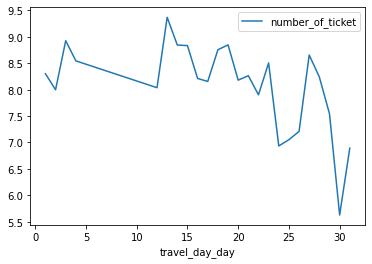

In [63]:
cols = ["travel_day_day", "number_of_ticket"]
train_df[cols].groupby("travel_day_day").mean().plot()

# Transformation

In [64]:
train_df.dtypes

ride_id                      int64
travel_date         datetime64[ns]
travel_time                  int64
travel_from                  int32
travel_to                   object
car_type                     int32
max_capacity                 int64
number_of_ticket             int64
hour_booked                  int64
travel_day                   int32
travel_time_log            float64
travel_month                 int32
travel_day_day               int32
time_period                float64
day_night                     int8
day_bins                     int64
dtype: object

In [65]:
#natural log of travel_time
log_day = np.log(train_df[['travel_day_day']].values).astype('float32')
train_df['log_day'] = log_day

##natural log of travel_from
#travel_from_ratio = np.log(df[['travel_time']]/df[['travel_from']].values).astype('float64')
#df['travel_from_ratio'] = travel_from_ratio

In [66]:
train_df.tail()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket,hour_booked,travel_day,travel_time_log,travel_month,travel_day_day,time_period,day_night,day_bins,log_day
6244,13812,2018-04-20,1390,10,Nairobi,0,1,11,23,4,7.237059,4,20,24.0,2,4,2.995732
6245,13813,2018-04-20,425,10,Nairobi,0,1,11,7,4,6.052089,4,20,8.0,1,4,2.995732
6246,13825,2018-04-20,429,14,Nairobi,0,1,1,7,4,6.061457,4,20,8.0,1,4,2.995732
6247,13826,2018-04-20,480,0,Nairobi,0,1,1,8,4,6.173786,4,20,8.0,1,4,2.995732
6248,14304,2017-11-14,310,7,Nairobi,0,1,1,5,1,5.736572,11,14,6.0,1,3,2.639057


In [67]:
train_df.isnull().sum()

ride_id             0
travel_date         0
travel_time         0
travel_from         0
travel_to           0
car_type            0
max_capacity        0
number_of_ticket    0
hour_booked         0
travel_day          0
travel_time_log     0
travel_month        0
travel_day_day      0
time_period         0
day_night           0
day_bins            0
log_day             0
dtype: int64

# ML Model Implementation

In [68]:
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# Stratification:

When we split the dataset into train and test datasets, the split is completely random. Thus the instances of each class label or outcome in the train or test datasets is random. Thus we may have many instances of class 1 in training data and less instances of class 2 in the training data. So during classification, we may have accurate predictions for class1 but not for class2. Thus we stratify the data, so that we have proportionate data for all the classes in both the training and testing data.

In [69]:
train_df.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket,hour_booked,travel_day,travel_time_log,travel_month,travel_day_day,time_period,day_night,day_bins,log_day
0,1442,2017-10-17,435,9,Nairobi,0,1,1,7,1,6.075346,10,17,8.0,1,3,2.833213
1,5437,2017-11-19,432,9,Nairobi,0,1,1,7,6,6.068426,11,19,8.0,1,4,2.944439
2,5710,2017-11-26,425,4,Nairobi,0,1,1,7,6,6.052089,11,26,8.0,1,5,3.258096
3,5777,2017-11-27,430,1,Nairobi,0,1,5,7,0,6.063785,11,27,8.0,1,6,3.295837
4,5778,2017-11-27,432,9,Nairobi,0,1,31,7,0,6.068426,11,27,8.0,1,6,3.295837


In [71]:
X = train_df.drop(["travel_date","travel_to","car_type","number_of_ticket","number_of_ticket"
             ,"hour_booked","travel_time_log","ride_id"], axis=1)
X.head()

,travel_time,travel_from,max_capacity,travel_day,travel_month,travel_day_day,time_period,day_night,day_bins,log_day
0,435,9,1,1,10,17,8.0,1,3,2.833213
1,432,9,1,6,11,19,8.0,1,4,2.944439
2,425,4,1,6,11,26,8.0,1,5,3.258096
3,430,1,1,0,11,27,8.0,1,6,3.295837
4,432,9,1,0,11,27,8.0,1,6,3.295837


In [72]:
X.dtypes

travel_time         int64
travel_from         int32
max_capacity        int64
travel_day          int32
travel_month        int32
travel_day_day      int32
time_period       float64
day_night            int8
day_bins            int64
log_day           float32
dtype: object

In [73]:
y = train_df.number_of_ticket.astype('float32')
y.head()

0     1.0
1     1.0
2     1.0
3     5.0
4    31.0
Name: number_of_ticket, dtype: float32

In [74]:
import pandas
setattr(pandas, "Int64Index", pandas.Index)
setattr(pandas, "Float64Index", pandas.Index)

from pydeseq2.ds import DeseqStats

ModuleNotFoundError: No module named 'pydeseq2'

In [75]:
#Split the dataset into train and Test
seed = 7
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# XGboost Classification

In [76]:
#Train the XGboost Model for Classification
model = xgb.XGBClassifier(n_estimators=100, 
                          max_depth=8, 
                          learning_rate=0.1, 
                          subsample=0.5)

In [77]:
model.fit(X_train, y_train)

[00:45:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
preds_train_set = model.predict(X_test)

In [79]:
print (mean_absolute_error(preds_train_set,y_test))

3.8221369


# Random forest model

In [80]:
model2 = RandomForestRegressor(n_estimators=100, 
                               criterion="friedman_mse", 
                               n_jobs=-1)

In [81]:
model2.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', n_jobs=-1)

In [82]:
preds2_train_set = model2.predict(X_test)

In [83]:
print (mean_absolute_error(preds2_train_set,y_test))

3.3259560673917674


# Support Vector Machine

In [84]:
from sklearn.svm import SVC
model3 = SVC(kernel = 'linear', C = 0.025, random_state = 101)

In [85]:
model3.fit(X_train, y_train)

SVC(C=0.025, kernel='linear', random_state=101)

In [89]:
preds3_train_set = model3.predict(X_test)

In [90]:
print (mean_absolute_error(preds3_train_set,y_test))

6.7581573


# kNN (k- Nearest Neighbors)

In [88]:

model4 = KNeighborsClassifier(n_neighbors=6)

In [91]:
model4.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [92]:
preds4_train_set = model4.predict(X_test)

In [93]:
print (mean_absolute_error(preds4_train_set,y_test))

5.6807423


# Catboost

In [95]:

from catboost import CatBoostRegressor
model5= CatBoostRegressor(iterations=5000, depth=3, learning_rate=0.1, loss_function='RMSE', silent=True)

In [96]:
model5.fit(X_train, y_train)

In [97]:
preds5_train_set = model5.predict(X_test)

In [98]:
print (mean_absolute_error(preds5_train_set,y_test))

3.5461396475955924


# Gradient Boosting Machines

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
model6 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

In [106]:
model6.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [107]:
preds6_train_set = model6.predict(X_test)

In [108]:
print (mean_absolute_error(preds6_train_set,y_test))

20.38004


# Predictions for test set

In [109]:
test_original

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,travel_time_log
0,247,2018-05-07,426,5,Nairobi,0,1,6.054439
1,256,2018-05-06,668,5,Nairobi,1,0,6.504288
2,275,2018-05-04,300,5,Nairobi,1,0,5.703782
3,285,2018-05-04,550,5,Nairobi,1,0,6.309918
4,286,2018-05-04,560,5,Nairobi,1,0,6.327937
...,...,...,...,...,...,...,...,...
1106,15336,2018-05-07,421,10,Nairobi,0,1,6.042633
1107,15337,2018-05-07,428,2,Nairobi,0,1,6.059123
1108,15338,2018-05-07,424,12,Nairobi,0,1,6.049733
1109,15339,2018-05-07,425,8,Nairobi,0,1,6.052089


In [113]:
test_df=test_original.drop_duplicates("ride_id")
test_df

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,travel_time_log
0,247,2018-05-07,426,5,Nairobi,0,1,6.054439
1,256,2018-05-06,668,5,Nairobi,1,0,6.504288
2,275,2018-05-04,300,5,Nairobi,1,0,5.703782
3,285,2018-05-04,550,5,Nairobi,1,0,6.309918
4,286,2018-05-04,560,5,Nairobi,1,0,6.327937
...,...,...,...,...,...,...,...,...
1106,15336,2018-05-07,421,10,Nairobi,0,1,6.042633
1107,15337,2018-05-07,428,2,Nairobi,0,1,6.059123
1108,15338,2018-05-07,424,12,Nairobi,0,1,6.049733
1109,15339,2018-05-07,425,8,Nairobi,0,1,6.052089


In [114]:
test_df['travel_month'] = pd.DatetimeIndex(test_original['travel_date']).month
test_df['travel_day_day'] = pd.DatetimeIndex(test_original['travel_date']).day
test_df

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,travel_time_log,travel_month,travel_day_day
0,247,2018-05-07,426,5,Nairobi,0,1,6.054439,5,7
1,256,2018-05-06,668,5,Nairobi,1,0,6.504288,5,6
2,275,2018-05-04,300,5,Nairobi,1,0,5.703782,5,4
3,285,2018-05-04,550,5,Nairobi,1,0,6.309918,5,4
4,286,2018-05-04,560,5,Nairobi,1,0,6.327937,5,4
...,...,...,...,...,...,...,...,...,...,...
1106,15336,2018-05-07,421,10,Nairobi,0,1,6.042633,5,7
1107,15337,2018-05-07,428,2,Nairobi,0,1,6.059123,5,7
1108,15338,2018-05-07,424,12,Nairobi,0,1,6.049733,5,7
1109,15339,2018-05-07,425,8,Nairobi,0,1,6.052089,5,7


In [116]:
test_df['travel_date'] = pd.to_datetime(test_df['travel_date']) 



test_df['travel_day'] = test_df['travel_date'].dt.dayofweek
test_df



,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,travel_time_log,travel_month,travel_day_day,travel_day
0,247,2018-05-07,426,5,Nairobi,0,1,6.054439,5,7,0
1,256,2018-05-06,668,5,Nairobi,1,0,6.504288,5,6,6
2,275,2018-05-04,300,5,Nairobi,1,0,5.703782,5,4,4
3,285,2018-05-04,550,5,Nairobi,1,0,6.309918,5,4,4
4,286,2018-05-04,560,5,Nairobi,1,0,6.327937,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...
1106,15336,2018-05-07,421,10,Nairobi,0,1,6.042633,5,7,0
1107,15337,2018-05-07,428,2,Nairobi,0,1,6.059123,5,7,0
1108,15338,2018-05-07,424,12,Nairobi,0,1,6.049733,5,7,0
1109,15339,2018-05-07,425,8,Nairobi,0,1,6.052089,5,7,0


In [119]:
test_df['time_period'] = np.ceil(test_df.travel_time.apply(calculate_time_period))
test_df.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,travel_time_log,travel_month,travel_day_day,travel_day,time_period
0,247,2018-05-07,426,5,Nairobi,0,1,6.054439,5,7,0,8.0
1,256,2018-05-06,668,5,Nairobi,1,0,6.504288,5,6,6,12.0
2,275,2018-05-04,300,5,Nairobi,1,0,5.703782,5,4,4,5.0
3,285,2018-05-04,550,5,Nairobi,1,0,6.309918,5,4,4,10.0
4,286,2018-05-04,560,5,Nairobi,1,0,6.327937,5,4,4,10.0


In [120]:
test_df['day_night'] = test_df.apply(func, axis=1)
test_df["day_night"] = pd.Categorical(test_df["day_night"])
day_night_categories = test_df.day_night.cat.categories
test_df["day_night"] = test_df.day_night.cat.codes
test_df.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,travel_time_log,travel_month,travel_day_day,travel_day,time_period,day_night
0,247,2018-05-07,426,5,Nairobi,0,1,6.054439,5,7,0,8.0,1
1,256,2018-05-06,668,5,Nairobi,1,0,6.504288,5,6,6,12.0,0
2,275,2018-05-04,300,5,Nairobi,1,0,5.703782,5,4,4,5.0,1
3,285,2018-05-04,550,5,Nairobi,1,0,6.309918,5,4,4,10.0,0
4,286,2018-05-04,560,5,Nairobi,1,0,6.327937,5,4,4,10.0,0


In [121]:
test_df['day_bins'] = pd.cut(test_df.travel_day_day, bins=7, labels=False)
pd.value_counts(test_df.travel_day_day)

travel_day_day
27    108
1     108
30     95
25     94
26     91
3      89
23     78
2      75
24     73
22     66
29     64
4      59
21     40
28     39
5      13
6      12
7       6
9       1
Name: count, dtype: int64

In [122]:
log_day = np.log(test_df[['travel_day_day']].values).astype('float32')
test_df['log_day'] = log_day

In [123]:
test_df

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,travel_time_log,travel_month,travel_day_day,travel_day,time_period,day_night,day_bins,log_day
0,247,2018-05-07,426,5,Nairobi,0,1,6.054439,5,7,0,8.0,1,1,1.945910
1,256,2018-05-06,668,5,Nairobi,1,0,6.504288,5,6,6,12.0,0,1,1.791759
2,275,2018-05-04,300,5,Nairobi,1,0,5.703782,5,4,4,5.0,1,0,1.386294
3,285,2018-05-04,550,5,Nairobi,1,0,6.309918,5,4,4,10.0,0,0,1.386294
4,286,2018-05-04,560,5,Nairobi,1,0,6.327937,5,4,4,10.0,0,0,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,15336,2018-05-07,421,10,Nairobi,0,1,6.042633,5,7,0,8.0,1,1,1.945910
1107,15337,2018-05-07,428,2,Nairobi,0,1,6.059123,5,7,0,8.0,1,1,1.945910
1108,15338,2018-05-07,424,12,Nairobi,0,1,6.049733,5,7,0,8.0,1,1,1.945910
1109,15339,2018-05-07,425,8,Nairobi,0,1,6.052089,5,7,0,8.0,1,1,1.945910


In [127]:
X_test_t = test_df.drop(["travel_date","travel_to","car_type"
             ,"travel_time_log","ride_id"], axis=1)
X_test_t

,travel_time,travel_from,max_capacity,travel_month,travel_day_day,travel_day,time_period,day_night,day_bins,log_day
0,426,5,1,5,7,0,8.0,1,1,1.945910
1,668,5,0,5,6,6,12.0,0,1,1.791759
2,300,5,0,5,4,4,5.0,1,0,1.386294
3,550,5,0,5,4,4,10.0,0,0,1.386294
4,560,5,0,5,4,4,10.0,0,0,1.386294
...,...,...,...,...,...,...,...,...,...,...
1106,421,10,1,5,7,0,8.0,1,1,1.945910
1107,428,2,1,5,7,0,8.0,1,1,1.945910
1108,424,12,1,5,7,0,8.0,1,1,1.945910
1109,425,8,1,5,7,0,8.0,1,1,1.945910


In [129]:
X_test_t = X_test_t[['travel_time','travel_from','max_capacity','travel_day','travel_month','travel_day_day','time_period','day_night','day_bins','log_day']]
X_test_t

,travel_time,travel_from,max_capacity,travel_day,travel_month,travel_day_day,time_period,day_night,day_bins,log_day
0,426,5,1,0,5,7,8.0,1,1,1.945910
1,668,5,0,6,5,6,12.0,0,1,1.791759
2,300,5,0,4,5,4,5.0,1,0,1.386294
3,550,5,0,4,5,4,10.0,0,0,1.386294
4,560,5,0,4,5,4,10.0,0,0,1.386294
...,...,...,...,...,...,...,...,...,...,...
1106,421,10,1,0,5,7,8.0,1,1,1.945910
1107,428,2,1,0,5,7,8.0,1,1,1.945910
1108,424,12,1,0,5,7,8.0,1,1,1.945910
1109,425,8,1,0,5,7,8.0,1,1,1.945910


In [130]:
test_set_predictions  = model2.predict(X_test_t)

In [131]:
d = {'ride_id': test_df["ride_id"], 'number_of_ticket': test_set_predictions}
df_predictions = pd.DataFrame(data=d)
df_predictions = df_predictions[['ride_id','number_of_ticket']]

In [132]:
df_predictions

,ride_id,number_of_ticket
0,247,2.96
1,256,1.32
2,275,1.27
3,285,1.38
4,286,1.30
...,...,...
1106,15336,6.54
1107,15337,8.07
1108,15338,2.70
1109,15339,6.76


In [133]:
# We read the labels into a csv file using the pandas library:
df_predictions.to_csv('C:/Users/F5401895/OneDrive - FRG/Documents/Zindi Data Science Challenges/Traffic_Jam_Predicting _Peoples_Movement_into_Nairobi/preds_test_set.csv')
